In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import *

from functionsSqueeze import w, wdot, H


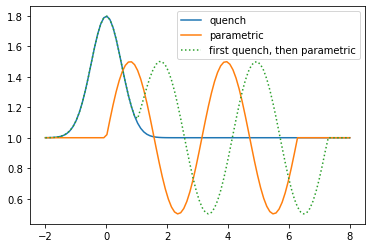

In [2]:
# plot different frequency modulations
tlist = np.linspace(-2,8,100)
wQuench = w(tlist, w0=1, dwQ=1, dtQ=0.5)
wQuenchD = wdot(tlist, w0=1, dwQ=1, dtQ=0.5)
wParam = w(tlist, w0=1, dwP=0.5, dtP=4*np.pi/2)
wBoth = w(tlist, w0=1, dwQ=1, dtQ=0.5, dwP=0.5, dtP=4*np.pi/2, delay=1)

plt.plot(tlist, wQuench, label="quench")
# plt.plot(tlist, wQuenchD, label="quench diff")
plt.plot(tlist, wParam, label="parametric")
plt.plot(tlist, wBoth,":", label="first quench, then parametric")
plt.legend()

In [4]:
n = 20
psi0 = fock(n,0)

argsQ = {'w0': 1,
       'dwQ': 1,
       'dtQ': 0.2,
       'dwP': 0,
       'dtP': 0,
       'delay': 0,
       'n': n}

argsP = {'w0': 1,
       'dwQ': 0,
       'dtQ': 0.1,
       'dwP': 0.5,
       'dtP': 4*np.pi/2,
       'delay': 0,
       'n': n}

argsQP = {'w0': 1,
       'dwQ': 1,
       'dtQ': 0.5,
       'dwP': 0.5,
       'dtP': 4*np.pi/2,
       'delay': 1,
       'n': n}

In [5]:
timesQ = np.linspace(-2,5,300)
resultQ = mesolve(H, psi0, timesQ, args=argsQ)

In [6]:
timesP = np.linspace(-1,10,400)
resultP = mesolve(H, psi0, timesP, args=argsP)

In [7]:
timesQP = np.linspace(-2,12,600)
resultQP = mesolve(H, psi0, timesQP, args=argsQP)

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0DBC92F0>,
       dtype=object))

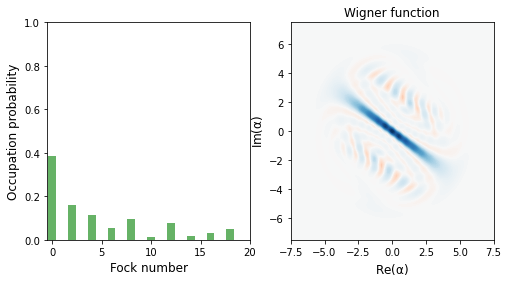

In [56]:
psi = resultQP.states[-1]

plot_wigner_fock_distribution(psi)

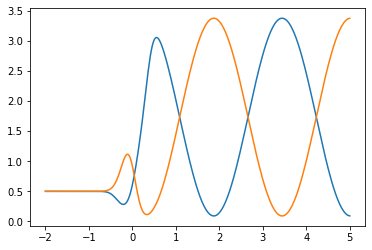

In [9]:
# dimensionless position and momentum operators
ad = create(n)
a = destroy(n)
x = 1/np.sqrt(2)*(ad + a)
p = 1/np.sqrt(2)*(ad - a)

# plot variance of x and p with time
varX = expect(x*x.dag(), resultQ.states)
varP = expect(p*p.dag(), resultQ.states)
plt.plot(timesQ, varX, label = "variance of x")
plt.plot(timesQ, varP, label = "variance of p")

(0.9949775560229434-0.9949775560229434j)

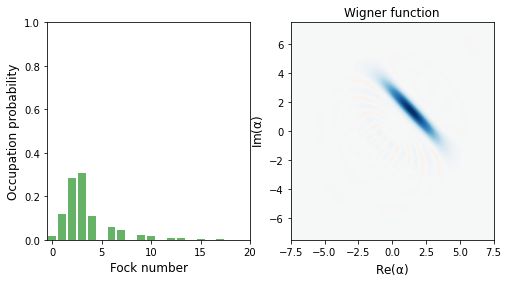

In [53]:
n = 20
psi = squeeze(n, -1j)*displace(n, 1+1j)*fock(n)
psi = displace(n, 1+1j)*squeeze(n, 1j)*fock(n)
# psi += displace(n, -1-1j)*squeeze(n, 1j)*fock(n)
# psi += displace(n, 1-1j)*squeeze(n, -1j)*fock(n)
# psi += displace(n, -1+1j)*squeeze(n, -1j)*fock(n)
plot_wigner_fock_distribution(psi)

numb = ad*a
expect(a.dag(), psi)

In [14]:
help(expect)

Help on function expect in module qutip.expect:

expect(oper, state)
    Calculates the expectation value for operator(s) and state(s).
    
    Parameters
    ----------
    oper : qobj/array-like
        A single or a `list` or operators for expectation value.
    
    state : qobj/array-like
        A single or a `list` of quantum states or density matrices.
    
    Returns
    -------
    expt : float/complex/array-like
        Expectation value.  ``real`` if `oper` is Hermitian, ``complex``
        otherwise. A (nested) array of expectaction values of state or operator
        are arrays.
    
    Examples
    --------
    >>> expect(num(4), basis(4, 3))
    3

